<a href="https://colab.research.google.com/github/KIM-CHAEYOUNG/d1/blob/master/0820_cross_val.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 방법1. 홀드아웃
- 데이터: 훈련데이터와 테스트데이터
- 주로 데이터가 너무 클 때 사용
- 데이터: 훈련데이터와 테스트데이터
+훈련데이터: 훈련데이터+검증데이터->테스트 테버

### 방법2. K폴드 교차검증
- RAW데이터를 분리
- RMSE의 평균값
- 데이터 수가 적을 때 주로 사용
- default연산량*k개

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%matplotlib inline
boston = load_boston()

# bostonDF=pd.DataFrame("")

In [11]:
# 독립변수
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
#종속변수
bostonDF['PRICE'] = boston.target 
print('Size of Dataset', bostonDF.shape)

Size of Dataset (506, 14)


In [12]:
bostonDF.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

CRIM per capita crime rate by town
ZN proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS proportion of non-retail business acres per town
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX nitric oxides concentration (parts per 10 million)
RM average number of rooms per dwelling
AGE proportion of owner-occupied units built prior to 1940
DIS weighted distances to five Boston employment centres
RAD index of accessibility to radial highways
TAX full-value property-tax rate per 10,000usd
PTRATIO pupil-teacher ratio by town
B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT % lower status of the population

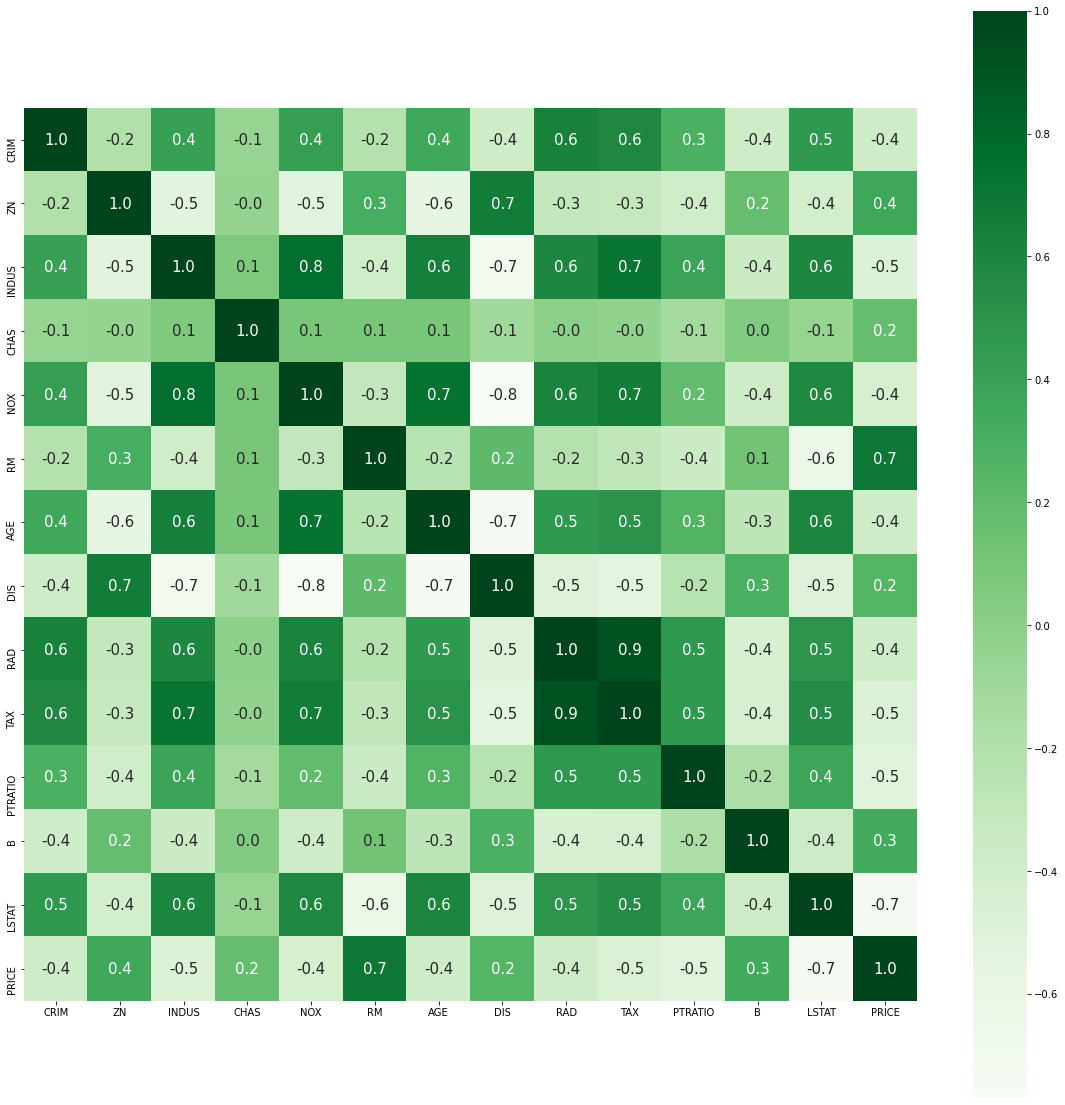

In [13]:
corr=bostonDF.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

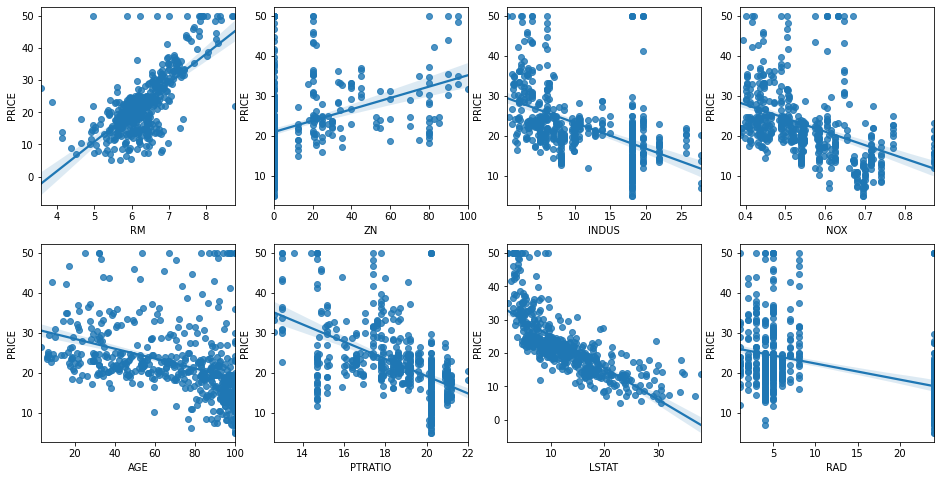

In [41]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE', data=bostonDF , ax=axs[row][col])

### (3) 모형 평가 검증 기본 설명\n",
- `MAE`는 `Mean Absolute Error(MAE)`이며, 실제 값과 예측값의 차이를 절대값으로 변환해 평균한 것\n
- `MSE`는 `Mean Squared ERROR(MSE)`이며, 실제값과 예측값의 차이를 제곱해 평균한 것
- `RMSE`는 `MSE`값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 `MSE`에 루트를 씌운 것이 `RMSE`이다.
- $R^2$는 분산 기반으로 예측 성능을 평가하며, 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측의 정확도가 높다.
- 사이킷런은 `RMSE` 제공하지 않는다. 따라서, 함수를 만든다. 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# 데이터 분리

In [43]:
 y_target = bostonDF['PRICE']
 X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

 X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state=156)

In [44]:
# Linear Regression OLS로 학습/예측/평가 수행
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
# 예측
y_pred=lr_model.predict(X_test)

In [46]:
mse=mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mse)

In [47]:
print('MSE: {0:3f}, RMSE:{1:3F}'.format(mse,rmse))

MSE: 132.556071, RMSE:11.513300


In [48]:
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

Variance score : -0.861


### (4) K폴드를 활용한 모형 평가

In [32]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()


In [33]:
# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [34]:
# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


- 교차검증의 목적은 '적은' 데이터에서 주로 사용
- 회귀 모형의 평가는  RMSE와  $R^2$
  + 'RMSE'는 클수록, $R^2$는 작을 수록 좋다